# Initial Comparisons 
- This notebook compares my preliminary kmeans implementation to that of sklearn
- In this implementations, the number of clusters (`k`) is specified and is not yet determined programmatically
- four data sets of 2d points were generated with k = [2, 3, 4, 5] respectively 
- plotting helper functions were also programmed to visualize the results
- the SSE (sum of squared error)

# Conclusion 
- My preliminary kmeans implementation is comparable to that of sk learn 
- They have the same SSE (sum of square error) 
- And the plots look identical 

In [1]:
from KMeans import KMeansClusterer

# A list of four sets of 2d points
from oldsamplesgen import gen_set1
# helper plotting functions visualize what kmeans is doing
from kmeansplottinghelper import initial_plots, colored_plots

from sklearn.cluster import KMeans
import numpy as np

# We're assuming that we don't need to scale the data 
#from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# The kmeans algorithm implementation of sklearn
def sklearn_kmeans(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    print("sse:",  kmeans.inertia_)
    return labels, centroids

In [3]:
# My kmeans algorithm implementation
def my_kmeans(data, nclusters, nr=20):
    # nr max number of random centroids  
    # initialization before settling 
    
    km = KMeansClusterer(data, nclusters, niters=100)
    km.fit(rstate=0)
    err, r = km.sse, 0
    labels, centroids = km.labels, km.centroids
    
    # find the best r (random initialization of centroids)
    for i in range(1, nr):
        km.fit(rstate=i)
        if (err > km.sse ):
            err, r = km.sse, i
            labels, centroids = km.labels, km.centroids
            
    print("sse:", err)
    return labels, centroids

In [4]:
# Plot a kmeans implementation given 4 sets of points
def plot_sample_kmeans(pointset, kmeans_function):
    idata, ilabels, icentroids, inclusters = [], [], [], []

    for i, points in enumerate(pointset):
        data, nclusters = pointset[i], i + 2
        # Make sure to shuffle the data, as they sorted by label
        np.random.shuffle(data)
        labels, centroids = kmeans_function(data, nclusters)
    
        idata.append(data)
        ilabels.append(labels)
        icentroids.append(centroids)
        inclusters.append(nclusters)

    colored_plots(idata, ilabels, icentroids, inclusters)

In [5]:
# load 4 data sets of 2d points of clusters [2, 3, 4, 5] 
pointset = gen_set1()

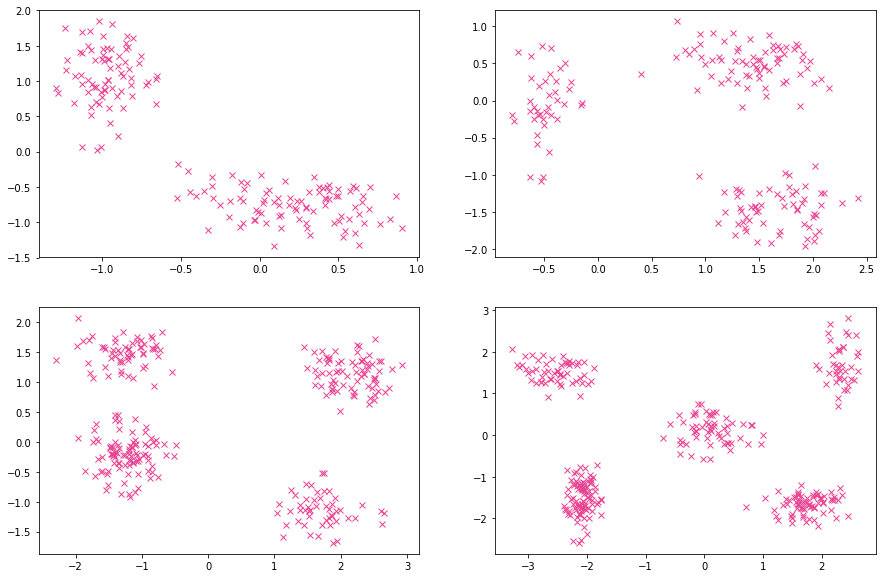

In [6]:
initial_plots(pointset)

sse: 29.696209845290944
sse: 31.453849049942605
sse: 51.20477233650454
sse: 61.34514589345974


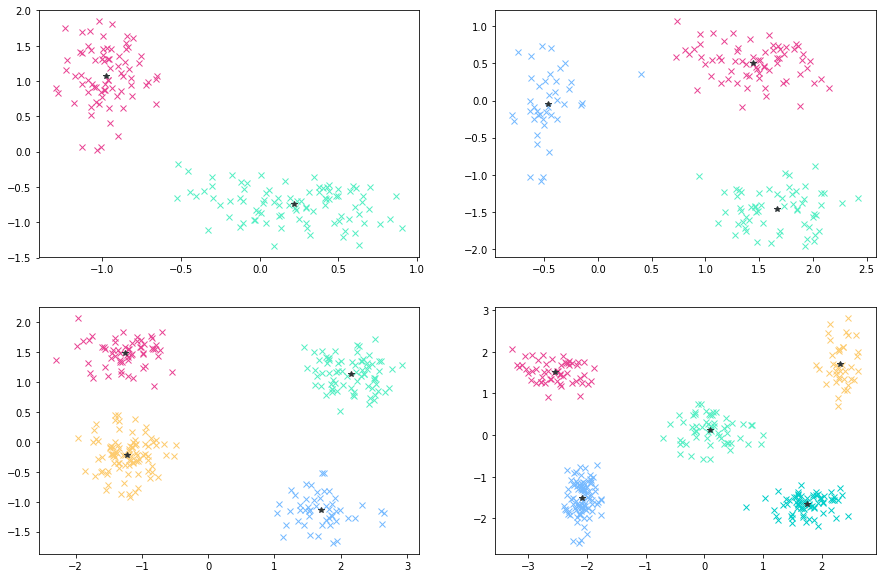

In [7]:
# This is how sklearn clusters each data set (centroid is the star)
# and corresponding SSE error is printed
skcentroids = plot_sample_kmeans(pointset, sklearn_kmeans)

sse: 29.696209845290944
sse: 31.453849049942605
sse: 51.20477233650455
sse: 61.345145893459744


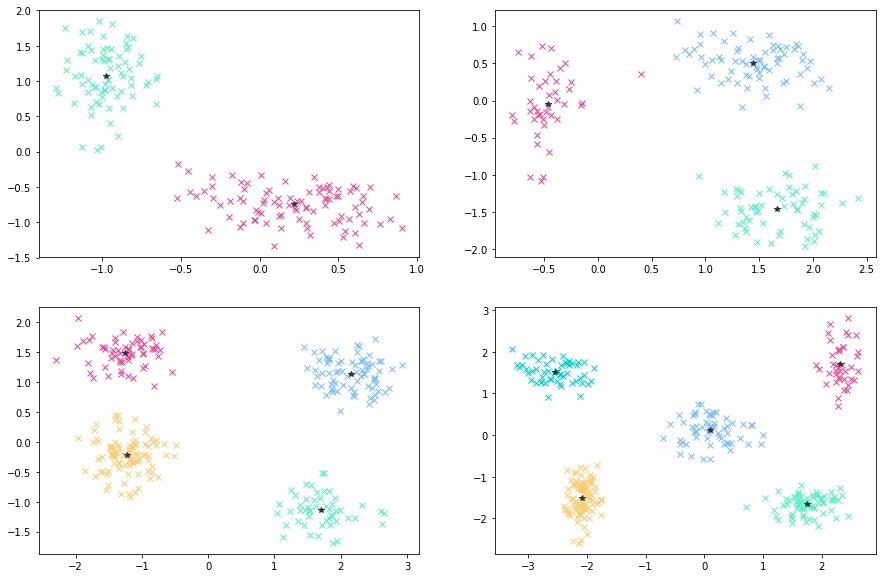

In [8]:
# This is how my implementation of kmeans clusters the same data set
# They have the same corresponding SSE error (and centroids)
mycentroids = plot_sample_kmeans(pointset, my_kmeans)